In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import paths
import os
from sklearn.model_selection import train_test_split

In [2]:
pathDog = './dataset/training_set/cachorro'
pathCat = './dataset/training_set/gato'

In [3]:
def load_images(path,size = (32,32)):
    imagePaths = list(paths.list_images(path))
   # imagePaths = imagePaths[0:10]
    images = []
    for (i,imagePath) in enumerate(imagePaths):
        try:
            imagePath = imagePath.replace('\\','/')
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
            image = cv2.resize(image,size,interpolation = cv2.INTER_AREA)
            image  = image.flatten()
            images.append(image)
            
        except:
            print('Imagem Corrompida!!')
    images = np.array(images)
    return images

In [4]:
dataDog = load_images(pathDog)
dataCat = load_images(pathCat)

In [5]:
labelDog = np.zeros(len(dataDog))
labelCat = np.ones(len(dataCat))

In [6]:
(D_train, D_test, dl_train, dl_test) = train_test_split( dataDog, labelDog, test_size=0.20, random_state=42)
(C_train, C_test, cl_train, cl_test) = train_test_split( dataCat, labelCat, test_size=0.20, random_state=42)

In [7]:
def processImage (image,size):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image,(32,32),interpolation  = cv2.INTER_AREA)
    image = image.flatten()
    image = image.astype('float32')
    return image

In [8]:
class knn :
    def __init__(self):
        pass
    
    def train (self,Xdog,Xcat,ydog,ycat):
        self.X_train = np.concatenate((Xdog,Xcat)).astype('float32')
        self.y = np.concatenate((ydog,ycat))
        
    def prever(self,image,size = (32,32),preprocess = False):
        if preprocess == False:
            image = processImage(image,size)
        num = self.X_train.shape[0]
        dist = np.empty(num)
        
        for i in range (num):
            arg1 = (self.X_train[i]**2).sum()
            arg2 = (image**2).sum()
            arg3 = (self.X_train[i] * image).sum()
            
            dist[i] = arg1 + arg2 - 2*(arg3)
            
        y_pred = self.y[np.argsort(dist)[0]]
        
        if y_pred == 0 :
            return 'Dog'
        else :
            return 'Cat'
        
            

In [9]:
path =  './dataset/test_set/gato/'
imagePaths = list(paths.list_images(path))

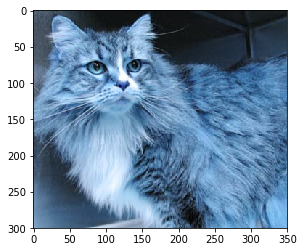

In [10]:
img = cv2.imread(imagePaths[0] )
plt.imshow(img)

In [11]:
knnClass = knn()
knnClass.train(D_train,C_train,dl_train,cl_train)
prev = knnClass.prever(img)
print(prev)

Cat


In [12]:
def accuracy(D_test,C_test,dl_test,cl_test):
    X = np.concatenate((D_test,C_test)).astype('float32')
    y = np.concatenate((dl_test,cl_test))
    count = 0
    for i in range (len(y)):
        y_pred = knnClass.prever(X[i],preprocess=True)
        if y_pred == 'Dog':
            y_pred = 0
        else :
            y_pred = 1
        
        if y[i] == y_pred :
            count+=1
    
    accuracy = (count/len(y))*100
    print('Accuracy :',accuracy)

In [13]:
accuracy(D_test,C_test,dl_test,cl_test)

Accuracy : 62.5


###### Tam do Dataset Treinamento -> 80 imagens de cachorro 80 de gato
######               teste       -> 20 imagens de cachorro 20 de gato
###### k =1